In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ardi_data = pd.read_csv("Cleaned_1_data.csv")

ardi_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,ConditionType,Category,Cause_of_Death,Data_Value_Alt,Effect,ConsumptionPattern,Sex,AgeGroup,AgeGroup_Cat
0,2015,2019,WV,West Virginia,ARDI,Chronic,Total,Total for All Causes,0.0,Harmful Effects,Excessive Alcohol Use,Female,Overall,Overall
1,2015,2019,WV,West Virginia,ARDI,Total,Total,Total for All Causes,7.0,Harmful Effects,Excessive Alcohol Use,Female,Overall,Overall
2,2015,2019,US,United States,ARDI,Acute,Alcohol-Related Poisonings,Alcohol poisoning,13.0,Harmful Effects,Excessive Alcohol Use,Female,Under 21,Under 21
3,2015,2019,US,United States,ARDI,Acute,Alcohol-Related Poisonings,Alcohol poisoning,1761.0,Harmful Effects,Excessive Alcohol Use,Male,Overall,Overall
4,2015,2019,WV,West Virginia,ARDI,Acute,Total,Total for All Causes,367.0,Harmful Effects,Any Alcohol Use,Male,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13142,2015,2019,WY,Wyoming,ARDI,Chronic,Total,Total for All Causes,83.0,Harmful Effects,Any Alcohol Use,Overall,65+,65 and older
13143,2015,2019,WY,Wyoming,ARDI,Total,Total,Total for All Causes,102.0,Harmful Effects,Any Alcohol Use,Overall,65+,65 and older
13144,2015,2019,WY,Wyoming,ARDI,Acute,Total,Total for All Causes,19.0,Harmful Effects,Excessive Alcohol Use,Overall,65+,65 and older
13145,2015,2019,WY,Wyoming,ARDI,Chronic,Total,Total for All Causes,77.0,Harmful Effects,Excessive Alcohol Use,Overall,65+,65 and older


In [10]:
# Age based 1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using SVR
def predict_by_agegroup_svr(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr','Sex', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = SVR(kernel='linear')  # Using a linear kernel for SVR
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
#     model = SVR(kernel='rbf')  # Using RBF kernel for SVR
#     model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test)
    
    svr_mse = mean_squared_error(y_test, y_pred)
    svr_mae = mean_absolute_error(y_test, y_pred)
    svr_r2 = r2_score(y_test, y_pred)
    
    return y_pred, svr_mse, svr_mae, svr_r2

# Example prediction using SVR based on AgeGroup
age_group = 'Under 21'

prediction, svr_mse, svr_mae, svr_r2 = predict_by_agegroup_svr(age_group)
print(f"SVR Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R2):", svr_r2)


SVR Predicted values for 'Under 21': [ 1.28355457e+01  1.37486942e+01 -2.57259946e-01 -2.69391581e-01
  1.38090515e+01 -2.93654849e-01 -1.60507754e-01  2.91001263e+01
  2.13581158e+01  1.32693442e+01 -3.42181386e-01  7.84602680e-01
  1.41325371e+01  1.24298229e+01  1.54059205e+01  1.36233412e+01
  1.24635335e+01  3.11865223e-01  1.00888747e+00  1.22104063e+00
 -1.05764959e-01 -7.56499124e-02  5.18103006e-01  2.56754591e+01
 -1.17896593e-01  8.02649691e-01  1.12239978e-01  1.32876921e+01
  1.46956067e+01  1.61836555e+01  1.36503246e-01  1.20149639e+01
 -1.42159862e-01  2.00847324e+01 -2.71233754e-02 -6.35182782e-02
  1.30450594e+01  1.36939514e+01  2.82690008e+01  5.85009234e-01
  1.34149238e+01  1.35847667e+01  2.82795445e+01  2.09158578e+01
  1.40655991e+01  2.79840897e+01  2.35901890e+01  1.30270442e+01
  1.45045493e+01  1.06388200e-01  3.36524771e-01  2.05438456e+01
  1.96765139e-01 -5.48419168e-01  2.87281141e+01  2.17638386e+01
  1.27315894e+01  2.84263476e+01  2.87983598e+01  2.6

In [4]:
# Age based 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using Gradient Boosting
def predict_by_agegroup_gb(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr','Sex', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = GradientBoostingRegressor()  # Using Gradient Boosting for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return y_pred, mse, mae, r2

# Example prediction using Gradient Boosting based on AgeGroup
age_group = 'Under 21'

prediction, mse, mae, r2 = predict_by_agegroup_gb(age_group)
print(f"Gradient Boosting Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Gradient Boosting Predicted values for 'Under 21': [ 62.1344102   -8.75865003  -6.48562698  -6.48562698  82.64513433
  -7.43045319   2.91705917  43.32657933  18.69578983   4.26922603
  -4.82790461  -4.37149874 118.87254533  23.52489899  18.69578983
 103.26271201 279.95492536  22.61771779  36.32265825  31.2091278
   1.9019689   -3.81281434   5.20875067  16.1954148    1.9019689
  29.08694763   2.91705917  78.05849005   4.32509528   4.32509528
   2.91705917 235.07225087   1.9019689   51.06530387  -3.81281434
  -3.81281434 -27.6322479   82.64513433  67.580068    -1.83604677
 105.28510755  82.64513433  20.11171543  33.94734318  88.01115866
  50.46210731  18.69578983 513.05834186  51.06530387   1.9019689
   2.91705917  33.94734318  -3.85751937  -3.81281434  43.32657933
   4.32509528 150.42635197  35.21055396  35.21055396  24.15872535
  33.94734318  36.44737772]
Mean Squared Error (MSE): 1745.8599709875532
Mean Absolute Error (MAE): 24.562047439454513
R-squared (R2): 0.6891723773286982


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using XGBoost
def predict_by_agegroup_xgb(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr','Sex', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = XGBRegressor()  # Using XGBoost for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    xgboost_mse = mean_squared_error(y_test, y_pred)
    xgboost_mae = mean_absolute_error(y_test, y_pred)
    xgboost_r2 = r2_score(y_test, y_pred)
    
    return y_pred, xgboost_mse, xgboost_mae, xgboost_r2

# Example prediction using XGBoost based on AgeGroup
age_group = 'Under 21'

prediction, xgboost_mse, xgboost_mae, xgboost_r2 = predict_by_agegroup_xgb(age_group)
print(f"XGBoost Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", xgboost_mse)
print("Mean Absolute Error (MAE):", xgboost_mae)
print("R-squared (R2):", xgboost_r2)


XGBoost Predicted values for 'Under 21': [ 1.3489310e+02 -2.1439786e+00  3.0087987e-02  8.9857078e-01
  2.6649540e+01 -8.3426751e-02  1.4003078e+00  2.5040737e+01
  2.1689243e+01 -2.5248581e+01 -4.1258279e-02  5.5513020e+00
  1.2395424e+02  1.6424643e+01  1.7499464e+01  1.1982189e+02
  3.1673660e+02  2.8540388e-01  1.0518590e+01  7.3113518e+01
  1.5480869e-02  1.7101046e-02 -7.0888743e-02  1.9289200e+01
  1.5480869e-02 -1.4489817e+01  3.2703439e-03 -4.9832771e+01
  2.1000004e+01  2.2605957e+01  3.2703439e-03  1.6912802e+02
  1.5480869e-02  4.3711830e+01 -2.2640049e-02  1.7101046e-02
 -5.4618840e+00  9.8976311e+01  1.3375414e+01  1.8637688e-01
  4.7523494e+00  2.2774666e+01  2.3611145e+01  2.3617651e+01
  7.2268623e+01  1.3178641e+01  2.6088335e+01  6.3188092e+02
  2.8159868e+01  5.4401185e-02  6.8037584e-02  1.7557577e+01
  1.0349366e+01 -3.7379363e-01  3.9489483e+01  5.1132269e+00
  3.8972511e+01 -1.5845554e+01  5.9628353e+01  1.4270939e+01
  3.0649618e+01  4.4952583e+00]
Mean Squared

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr', 'Sex', 'ConditionType', 'Category', 'Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using Random Forest
def predict_by_agegroup_rf(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr', 'Sex', 'ConditionType', 'Category', 'Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()  # Using RandomForestRegressor for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rf_mse = mean_squared_error(y_test, y_pred)
    rf_mae = mean_absolute_error(y_test, y_pred)
    rf_r2 = r2_score(y_test, y_pred)
    
    return y_pred, rf_mse, rf_mae, rf_r2

# Example prediction using Random Forest based on AgeGroup
age_group = 'Under 21'

prediction, rf_mse, rf_mae, rf_r2 = predict_by_agegroup_rf(age_group)
print(f"Random Forest Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)


Random Forest Predicted values for 'Under 21': [1.1975e+02 7.3100e+00 3.5000e-01 9.1000e-01 8.4500e+01 1.1000e-01
 1.4200e+00 2.4830e+01 1.6740e+01 3.8480e+01 0.0000e+00 1.4320e+01
 1.5727e+02 3.0060e+01 2.1840e+01 1.4825e+02 2.9192e+02 1.0000e-01
 1.5410e+01 5.1660e+01 1.0000e-02 0.0000e+00 4.0000e-02 2.7600e+01
 0.0000e+00 1.2500e+00 0.0000e+00 8.1430e+01 2.1040e+01 2.2870e+01
 0.0000e+00 2.4280e+02 0.0000e+00 2.6390e+01 0.0000e+00 0.0000e+00
 1.6080e+01 7.4920e+01 1.0335e+02 0.0000e+00 3.3500e+01 3.8470e+01
 2.3580e+01 2.0090e+01 1.3086e+02 1.1124e+02 1.2990e+01 5.8865e+02
 8.0430e+01 0.0000e+00 0.0000e+00 2.1140e+01 3.8000e-01 3.0000e-02
 3.0930e+01 1.1920e+01 5.0539e+02 4.3460e+01 4.3550e+01 3.3010e+01
 1.9010e+01 5.8100e+00]
Mean Squared Error (MSE): 5830.341217741936
Mean Absolute Error (MAE): 31.64790322580645
R-squared (R2): -0.03801629580185195


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr', 'Sex', 'ConditionType', 'Category', 'Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using Linear Regression
def predict_by_agegroup_linear(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr', 'Sex', 'ConditionType', 'Category', 'Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()  # Using Linear Regression for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    linear_mse = mean_squared_error(y_test, y_pred)
    linear_mae = mean_absolute_error(y_test, y_pred)
    linear_r2 = r2_score(y_test, y_pred)
    
    return y_pred, linear_mse, linear_mae, linear_r2

# Example prediction using Linear Regression based on AgeGroup
age_group = '35-49'

prediction, linear_mse, linear_mae, linear_r2 = predict_by_agegroup_linear(age_group)
print(f"Linear Regression Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", linear_mse)
print("Mean Absolute Error (MAE):", linear_mae)
print("R-squared (R2):", linear_r2)


Linear Regression Predicted values for '35-49': [ 363.04192089 -143.20523644  201.30804972  494.50677644  288.65345646
   90.51824385  223.34671216  432.48949849  193.69381485  392.36897342
 -175.70890295  591.91127975  278.81516375  185.71569816  277.43314649
  167.94131444  225.24239979   32.08863649  -93.88226779  243.58951912
 -133.77285123  122.43071061  367.52554818  279.7662646   368.43462335
  448.21579025   97.95641458  400.34709011  583.93316306  393.14673209
  317.08202686  615.84562982  343.23518738  265.13298323 -103.90585274
  815.29854705  184.9379395   425.05919884  390.50879741  233.5843983
 -132.86902345  -87.35841962  424.28144018  -33.7134044   217.2642831
  456.19390694  366.57444734  327.63496473  398.48691409   -8.57435997
   24.1105198   101.91457932 -247.51195315  -16.14656916  143.78227014
  185.71569816  188.61374042  414.44314747  268.88748195  775.40796361
  363.04192089  558.14252734  -27.66644831  510.18054775   33.76759924
   25.78948255  260.90936526   

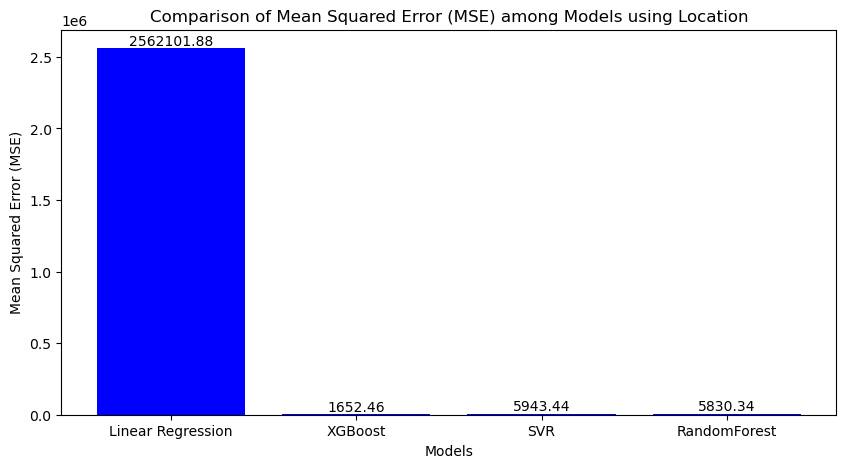

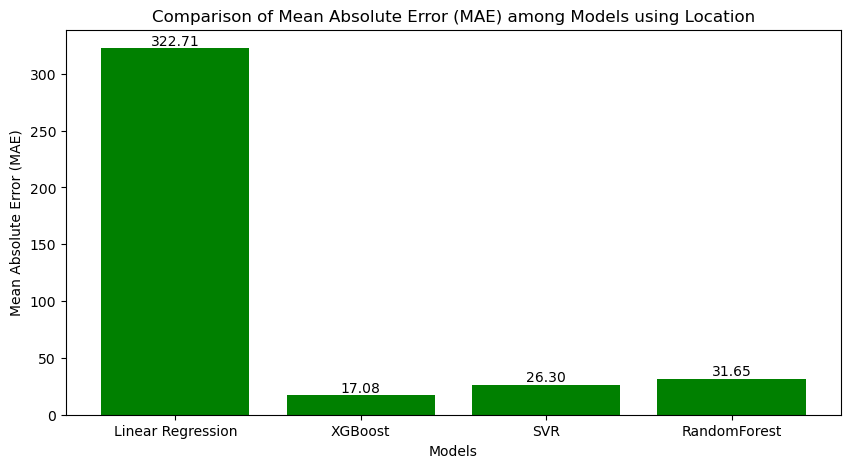

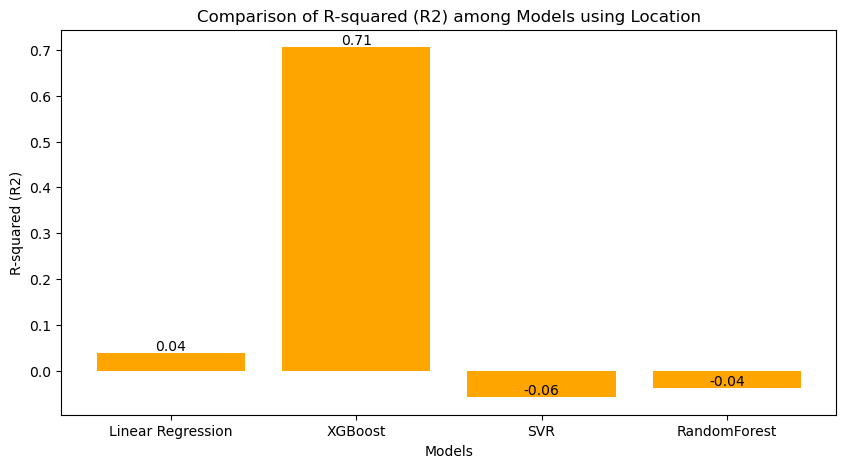

In [12]:
import matplotlib.pyplot as plt

# Create a list of model names and their respective metrics
models = ['Linear Regression', 'XGBoost', 'SVR', 'RandomForest']
mse_scores = [linear_mse, xgboost_mse, svr_mse, rf_mse]
mae_scores = [linear_mae, xgboost_mae, svr_mae,rf_mae]
r2_scores = [linear_r2, xgboost_r2, svr_r2,rf_r2]

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mse_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Models using Location')

# Add annotations to the bars
for bar, mse in zip(bars, mse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

plt.show()


# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Models using Location')
# Add annotations to the bars
for bar, mae in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

plt.show()

# Plot R-squared (R2)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) among Models using Location')
# Add annotations to the bars
for bar, r2 in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

plt.show()

